# SEIRDS model

This notebook contains code for runnning an SEIRDS model for disease propagation.

We will use the Euler method to numerically sovle coupled first order ODE's for the SEIRDS ODE model.

S = Susceptible, E = Exposed, I = Infected, R = Recovered, D = Dead, N = Total = S+E+I+R+D

$\frac{dS}{dt}=-SI\frac{q\beta}{N}+\tau R$

$\frac{dE}{dt}=SI\frac{q\beta}{N}-\delta E$

$\frac{dI}{dt}=\delta E-(1-\alpha)\gamma I-\alpha\rho I$

$\frac{dR}{dt}=(1-\alpha)\gamma I-\tau R$

$\frac{dD}{dt}=\alpha\rho I$

Here, $\beta$ represents the average number of people that come within infection range of an infected individual per day, which is given by $\frac{1}{\text{number of individuals}}$. $\gamma$ is the remove probability per day, which is given by $\frac{1}{\text{recovery time}}$. $\delta$ is the rate at which exposed individuals become infected (incubation period), which is given by $\frac{1}{\text{incubation period}}$. $\alpha$ is the percentage of infected people who die. $\rho$ is the rate at which people die, given as $\frac{1}{\text{time infected before death}}$. q is the mitigation factor due to quarantining (between 0 and 1), where 0 is perfect quarantine and 1 is no quarantine. $\tau$ is the rate which recovered individuals return to the susceptible population due to loss of immunity.

Below we import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import sys

Now we initialize parameters.

Time step in days:

In [2]:
dt = 0.01

Total time in days:

In [3]:
tottime = 365

Other parameters:

In [4]:
beta = 0.25
gamma = 0.07 #approximately 14 days infected after exposure
delta = 0.20 #5 days exposed before infectious
alpha = 0.05 #5% of infected die
rho = 0.05 #20 days infected before death
q = 1 #assumes no quarantine
tau = 0.01 #assumes individuals lose immunity after about 3 months
N = 5E4

Initial population conditions:

In [5]:
pr = 0.0 #initial percent recovered (immune)
pe = 0.0 #initial percent exposed
pi = 0.0001 #initial percent infected
ps = 1-pr-pe-pi #initial percent susceptible

Initializing population arrays:

In [6]:
niter = int(math.ceil(tottime/dt))
t = np.arange(0, tottime, dt)
S = np.zeros(niter)
E = np.zeros(niter)
I = np.zeros(niter)
R = np.zeros(niter)
D = np.zeros(niter)

Applying initial population conditions:

In [7]:
S[0] = ps*N
E[0] = pe*N
I[0] = pi*N
R[0] = pr*N
D[0] = 0

Implementing Euler's method:

In [8]:
for j in range(niter-1):
    dSdt = -q*beta/N*S[j]*I[j] + tau*R[j]
    dEdt = q*beta/N*S[j]*I[j] - delta*E[j]
    dIdt = delta*E[j] - (1-alpha)*gamma*I[j] - alpha*rho*I[j]
    dRdt = (1-alpha)*gamma*I[j] - tau*R[j]
    dDdt = alpha*rho*I[j]
    S[j+1] = S[j] + dt*dSdt
    E[j+1] = E[j] + dt*dEdt
    I[j+1] = I[j] + dt*dIdt
    R[j+1] = R[j] + dt*dRdt
    D[j+1] = D[j] + dt*dDdt
N = S + E + I + R + D

Plotting:

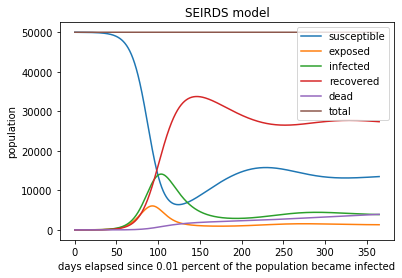

In [9]:
plt.plot(t, S)
plt.plot(t, E)
plt.plot(t, I)
plt.plot(t, R)
plt.plot(t, D)
plt.plot(t, N)
plt.legend(['susceptible', 'exposed', 'infected', 'recovered', 'dead', 'total'], loc = 'upper right')
plt.title('SEIRDS model')
plt.xlabel('days elapsed since 0.01 percent of the population became infected')
plt.ylabel('population')
plt.show()

# Sources:

https://www.davidketcheson.info/2020/03/19/SIR_Estimating_parameters.html

https://www.davidketcheson.info/2020/03/19/SIR_predictions.html

https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

https://idmod.org/docs/malaria/model-sir.html